# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [8]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch
#from ddpg_agent import Agent
from ddpg_agent_tennis import Agent

/home/mond/virt_env/DRLND/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: 0.05
Episode 283

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 753	Average Score: 0.05
Episode 754	Average Score: 0.05
Episode 755	Average Score: -0.00
Episode 756	Average Score: 0.20
Episode 757	Average Score: 0.15
Episode 758	Average Score: -0.00
Episode 759	Average Score: 0.10
Episode 760	Average Score: -0.00
Episode 761	Average Score: 0.25
Episode 762	Average Score: 0.15
Episode 763	Average Score: -0.00
Episode 764	Average Score: 0.20
Episode 765	Average Score: 0.05
Episode 766	Average Score: 0.05
Episode 767	Average Score: 0.20
Episode 768	Average Score: -0.00
Episode 769	Average Score: 0.25
Episode 770	Average Score: 0.05
Episode 771	Average Score: 0.10
Episode 772	Average Score: 0.25
Episode 773	Average Score: 0.15
Episode 774	Average Score: 0.50
Episode 775	Average Score: 0.85
Episode 776	Average Score: 0.10
Episode 777	Average Score: 0.10
Episode 778	Average Score: 0.10
Episode 779	Average Score: 0.90
Episode 780	Average Score: 0.45
Episode 781	Average Score: 0.30
Episode 782	Average Score: 0.10
Episode 783	Average Score: 0.05
Epi

Episode 969	Average Score: 0.15

Environment solved in 869 episodes!
Episode 970	Average Score: 1.95

Environment solved in 870 episodes!
Episode 971	Average Score: 0.40

Environment solved in 871 episodes!
Episode 972	Average Score: 0.90

Environment solved in 872 episodes!
Episode 973	Average Score: 2.60

Environment solved in 873 episodes!
Episode 974	Average Score: 2.60

Environment solved in 874 episodes!
Episode 975	Average Score: 0.90

Environment solved in 875 episodes!
Episode 976	Average Score: 0.85

Environment solved in 876 episodes!
Episode 977	Average Score: 0.45

Environment solved in 877 episodes!
Episode 978	Average Score: 0.25

Environment solved in 878 episodes!
Episode 979	Average Score: 0.25

Environment solved in 879 episodes!
Episode 980	Average Score: 1.00

Environment solved in 880 episodes!
Episode 981	Average Score: 1.30

Environment solved in 881 episodes!
Episode 982	Average Score: 0.55

Environment solved in 882 episodes!
Episode 983	Average Score: 0.05

E

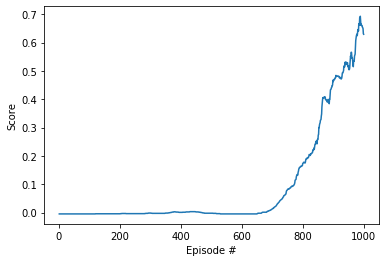

In [6]:
# n_episodes=4000
# max_t=1000 not 100
def ddpg(n_episodes=1000, max_t=1000, print_every=1):
    mean_scores = []
    scores_window = deque(maxlen=100) 
    moving_avgs = []                              
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]      
            next_states = env_info.vector_observations 
            rewards = env_info.rewards 
            dones = env_info.local_done 
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)

            states = next_states
            scores += rewards
            if np.any(dones):
                break 

        #print(scores)
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))
        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    return moving_avgs


agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()